In [166]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
print(np.__version__)

1.4.0
1.19.4


In [2]:
# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

In [3]:
# crate tenaorflow structure
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data+biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5) # Gradient Descent Optimizer
train = optimizer.minimize(loss)

init = tf.initialize_all_variables();


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
sess = tf.Session()
sess.run(init)
for step in range(201):
    sess.run(train)
    if step % 20 ==0:
        print(step,sess.run(Weights), sess.run(biases))

0 [-0.15368038] [0.6202129]
20 [0.01831438] [0.34485498]
40 [0.07978066] [0.3111028]
60 [0.09499519] [0.30274823]
80 [0.09876119] [0.30068028]
100 [0.09969338] [0.3001684]
120 [0.0999241] [0.30004168]
140 [0.09998122] [0.30001032]
160 [0.09999534] [0.30000257]
180 [0.09999885] [0.30000064]
200 [0.09999973] [0.30000016]


# Session 使用

In [19]:
matrix1 = tf.constant([[3,3]]) # 1行两列 常量
matrix2 = tf.constant([[2],
                       [2]])
product = tf.matmul(matrix1,matrix2) # matrix multiply np.dot(m1,m2)

with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12]]


# Variable

In [34]:
state = tf.Variable(0,name="counter")
# print(state.name)
one = tf.constant(1)

new_value = tf.add(state ,one)

update = tf.assign(state,new_value)

init = tf.initialize_all_variables() # 初始化所有变量

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        print(sess.run(update))
        print(sess.run(state))




1
1
2
2
3
3


# placeholder

In [45]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.,8], input2:[2.]}))

[14. 16.]


# activation function
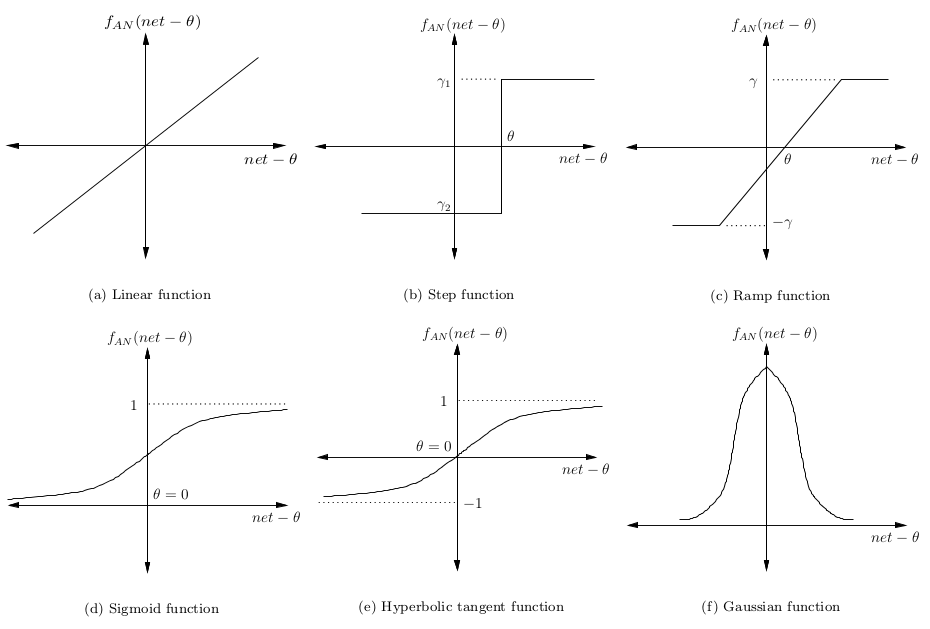

In [132]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases= tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases # 没有被激活的值
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [129]:
x_data = np.linspace(-1,1,300)[:,np.newaxis].astype(np.float32)
noise = np.random.normal(0,0.05,x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise


In [135]:
l1 = add_layer(x_data, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1)

loss = tf.reduce_mean(tf.reduce_sum( tf.square(y_data - prediction), reduction_indices=[1]))

optimizer= tf.train.GradientDescentOptimizer(0.1)
train_step = optimizer.minimize(loss)

init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train_step)
        if i % 50 ==0:
            print(sess.run(loss))
            

0.029626865
0.006172639
0.005909051
0.005612042
0.00532818
0.0050581535
0.0048397477
0.0046383147
0.004477936
0.0043264637
0.0041894885
0.0040677544
0.0039648446
0.0038685426
0.0037664883
0.0036864416
0.0036113607
0.0035322125
0.0034627921
0.0033899294


In [287]:
# x_data = np.linspace(-1,1,1000).reshape([1000,1]).astype(np.float32)  
# y_data = x_data*2-1
x_data = np.linspace(-1,1,100)[:,np.newaxis].astype(np.float32)
noise = np.random.normal(0,0.05,x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise
# print(x_data)
# print(y_data)

# 从输入数据（1个输入数据）到隐含层（有5个神经元）
Weights = tf.Variable(tf.random_normal([1,5]))
biases= tf.Variable(tf.zeros([1, 5]) + 0.1)
Wx_plus_b = tf.matmul(x_data, Weights) + biases # 没有被激活的值
outputs = tf.nn.relu(Wx_plus_b)

# 从隐含层（有5个神经元）到输出层（有一个输出数据）
Weights2 = tf.Variable(tf.random_normal([5,1]))
biases2 = tf.Variable(tf.zeros([1, 1]) + 0.1)
Wx_plus_b2 = tf.matmul(outputs, Weights2) + biases2 # 没有被激活的值

# 主要是构建出loss
loss = tf.reduce_mean(tf.reduce_sum( tf.square(y_data - Wx_plus_b2), reduction_indices=[1]))
init = tf.initialize_all_variables();
optimizer= tf.train.GradientDescentOptimizer(0.1)
train_step = optimizer.minimize(loss)
# 迭代减少loss
with tf.Session() as sess:
    sess.run(init)
#     print(sess.run(Weights2))
#     print(sess.run(biases2))
#     print(sess.run(Wx_plus_b2))
#     print(sess.run(loss))
#     print(sess.run(outputs))
    for i in range(1000):
        sess.run(train_step)
        if i % 50 ==0:
            print(sess.run(loss))


0.15061803
0.02883733
0.010835546
0.0070532006
0.0061745225
0.005777172
0.0055055297
0.005295871
0.0051040133
0.004912165
0.004751304
0.0046260357
0.004522845
0.0043863608
0.004251102
0.0041063786
0.0039415066
0.0038105838
0.0036981618
0.0036056405


In [288]:

x_data = np.linspace(-1,1,5).astype(np.float32)
y_data = x_data*2-1

Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))
y = x_data*Weights+biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5) 
train = optimizer.minimize(loss)

sess = tf.Session()
init = tf.initialize_all_variables();
sess.run(init)
for step in range(50):
    sess.run(train)
    if step % 10 ==0:
        print("loss=",sess.run(loss),
              " Weights=", step,sess.run(Weights),
              " biases=", sess.run(biases))

#     print(sess.run(x_data*Weights+biases))
#     print(sess.run(tf.matmul(x_data, Weights) + biases))

loss= 0.13475612  Weights= 0 [1.4808543]  biases= [-1.0000001]
loss= 1.2853512e-07  Weights= 10 [1.999493]  biases= [-0.99999994]
loss= 1.1368684e-13  Weights= 20 [1.9999995]  biases= [-1.]
loss= 0.0  Weights= 30 [2.]  biases= [-1.]
loss= 0.0  Weights= 40 [2.]  biases= [-1.]


In [2]:
# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs
sess = tf.Session()


def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
#     print(y_pre)
#     print(v_ys)
#     print(sess.run(tf.argmax(y_pre,1)))
#     print(sess.run(tf.argmax(v_ys,1)))
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
prediction = add_layer(xs, 784, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
   # print(sess.run(prediction,feed_dict={xs:batch_xs,ys:batch_ys}))
    if i % 50 == 0:
        print(compute_accuracy(
        mnist.test.images, mnist.test.labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.0972
0.6625
0.751
0.7925
0.8153
0.822
0.835
0.8412
0.8465
0.8504
0.8563
0.8554
0.8604
0.8585
0.8631
0.8672
0.098
0.098
0.098
0.098


In [10]:
from sklearn import datasets
iris=datasets.load_iris()
x_vals=np.array([[x[0],x[3]] for x in iris.data])
y_vals=np.array([1 if y==0 else -1 for y in iris.target])

train_indices=np.random.choice(len(x_vals),round(len(x_vals)*0.8),replace=False)
test_indices=np.array(list(set(range(len(x_vals)))-set(train_indices)))
x_vals_train=x_vals[train_indices]
x_vals_test=x_vals[test_indices]
y_vals_train=y_vals[train_indices]
y_vals_test=y_vals[test_indices]

In [12]:
#设置图
sess=tf.Session()

#设置图参数
batch_size=100
x_data=tf.placeholder(shape=[None,2],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)

A=tf.Variable(tf.random_normal(shape=[2,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))

#设置模型
model_output=tf.subtract(tf.matmul(x_data,A),b)

#设置损失函数
l2_norm=tf.reduce_sum(tf.square(A))
alpha=tf.constant([0.1])
classification_term=tf.reduce_mean(tf.maximum(0.0,tf.subtract(1.0,tf.multiply(model_output,y_target))))
loss=tf.add(classification_term,tf.multiply(alpha,l2_norm))

In [16]:
#声明预测函数
prediction=tf.sign(model_output)

#声明准确度函数
accuracy=tf.reduce_mean(tf.cast(tf.equal(prediction,y_target),tf.float32))
#声明优化器函数
my_opt=tf.train.GradientDescentOptimizer(0.01)
train_step=my_opt.minimize(loss)
init=tf.global_variables_initializer()
sess.run(init)

In [ ]:
loss_vec=[]
train_accuracy=[]
test_accuracy=[]
for i in range(500):
    rand_index=np.random.choice(len(x_vals_train),size=batch_size)
    rand_x=x_vals_train[rand_index]
    rand_y=np.transpose([y_vals_train[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})

    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)

    train_acc_temp=sess.run(accuracy,feed_dict={x_data:x_vals_train,y_target:np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)

    test_acc_temp=sess.run(accuracy,feed_dict={x_data:x_vals_test,y_target:np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)
print(train_accuracy)
print(test_accuracy)

In [39]:
#这里使用TensorFlow自带的数据集作为测试，以下是导入数据集代码 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [163]:
Xtrain, Ytrain = mnist.train.next_batch(5000)  #从数据集中选取5000个样本作为训练集
Xtest, Ytest = mnist.test.next_batch(200)    #从数据集中选取200个样本作为测试集
print(Xtest)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [5]:
# 输入占位符
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])
# 计算L1距离
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# 获取最小距离的索引
pred = tf.arg_min(distance, 0) # np.argmin(sess.run(distance, feed_dict={xtr: Xtrain, xte: Xtest[i, :]}))
 

Instructions for updating:
Use `argmin` instead


In [49]:
# 初始化变量
init = tf.global_variables_initializer()
#分类精确度
accuracy = 0.
# 运行会话，训练模型
with tf.Session() as sess:
    # 运行初始化
    sess.run(init)
    # 遍历测试数据
    for i in range(len(Xtest)):
        # 获取当前样本的最近邻索引
        nn_index = sess.run(pred, feed_dict={xtr: Xtrain, xte: Xtest[i, :]})   #向占位符传入训练数据
#         print("Test", i, "Prediction:", Ytrain[nn_index],"True Class:", Ytest[i])
#         print(np.argmin(sess.run(distance, feed_dict={xtr: Xtrain, xte: Xtest[i, :]})),nn_index)
        # 最近邻分类标签与真实标签比较
        if i%50==0:
            print("Test", i, "Prediction:", np.argmax(Ytrain[nn_index]),"True Class:", np.argmax(Ytest[i]))# argmax最大值的下标
        # 计算精确度
        if np.argmax(Ytrain[nn_index]) == np.argmax(Ytest[i]):
            accuracy += 1./len(Xtest)
print("Accuracy:", accuracy)

Test 0 Prediction: 6 True Class: 6
Test 50 Prediction: 4 True Class: 4
Test 100 Prediction: 1 True Class: 1
Test 150 Prediction: 4 True Class: 4
Accuracy: 0.9150000000000007


In [53]:
import pandas as pd
df = pd.read_csv("data/cjb.csv")

In [142]:

train_set = np.random.choice(len(df), 500, replace=False)
Xtrain = np.array(df.iloc[train_set,3:12])
Ytrain = np.array(df.iloc[train_set,[12]])
Xtest =  np.array(df.iloc[-train_set,3:12])
Ytest =  np.array(df.iloc[-train_set,[12]])

len(Xtest[1])

9

In [148]:
# 输入占位符
xtr = tf.placeholder("float", [None, 9]) # 不规定有多少sample,每个sample有9个属性
xte = tf.placeholder("float", [9])
# 计算L1距离
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# 获取最小距离的索引
pred = tf.arg_min(distance, 0) # np.argmin(sess.run(distance, feed_dict={xtr: Xtrain, xte: Xtest[i, :]}))

In [165]:
# 初始化变量
init = tf.global_variables_initializer()
#分类精确度
accuracy = 0.
# 运行会话，训练模型
with tf.Session() as sess:
    # 运行初始化
    sess.run(init)
    # 遍历测试数据
    for i in range(len(Xtest)):
        # 获取当前样本的最近邻索引
        nn_index = sess.run(pred, feed_dict={xtr: Xtrain, xte: Xtest[i, :]})   #向占位符传入训练数据
        if i%50==0:
            print("Test", i, "Prediction:", Ytrain[nn_index],"True Class:", Ytest[i])
#         计算精确度
        if Ytrain[nn_index] == Ytest[i]:
            accuracy += 1./len(Xtest)
print("Accuracy:", accuracy)

ValueError: Cannot feed value of shape (5000, 784) for Tensor 'Placeholder_12:0', which has shape '(?, 9)'

In [167]:
import keras

ModuleNotFoundError: No module named 'keras'